In [2]:
%run 'init.ipynb'
save = get_figsave(5)

<function __main__.get_figsave.<locals>.save(fig, name)>

In [3]:
x1 = -8/5

def hr(x, y, z, I, r, a=1, b=3, c=1, d=5, s=4):
    return np.array((
        y - a*x**3 + b*x**2 + I - z,
        c - d*x**2 - y,
        r * (s*(x-x1) - z),
    ))


def get_f_hr(I, r):
    def f_hr(t, y):
        return hr(y[0], y[1], y[2], I, r)
    return f_hr

In [4]:
mpl.style.use({'figure.constrained_layout.use': False})

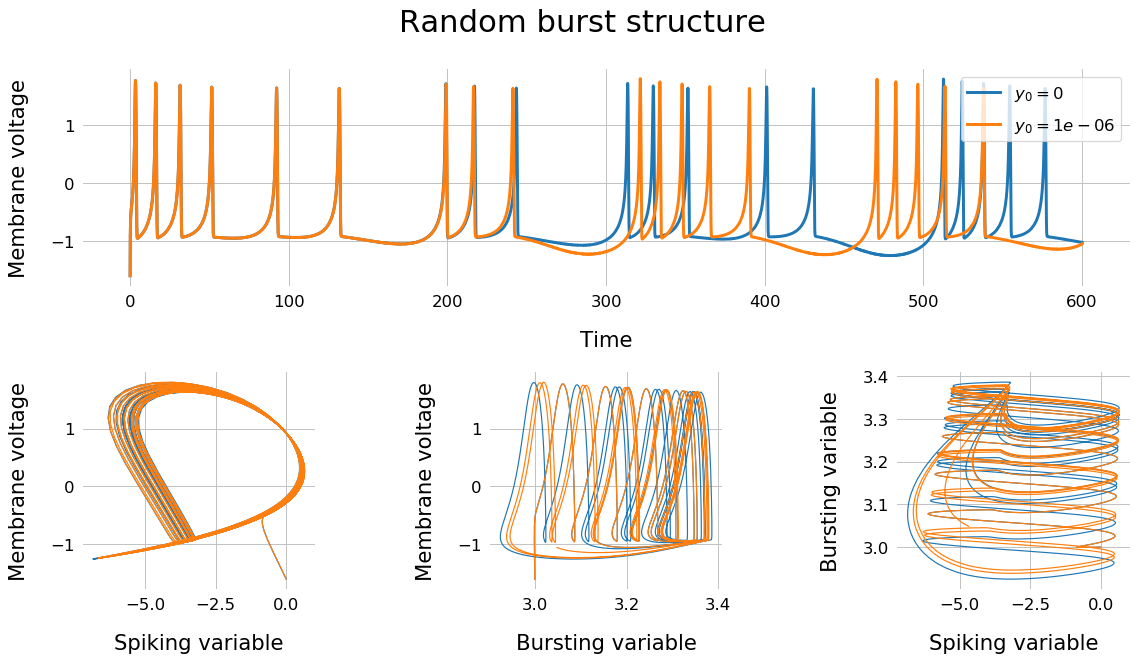

In [5]:
from scipy.integrate import solve_ivp

modes = (
    'Random burst structure',
    'Burst generation',
)

def plot(mode=0, y0=0, savee=False):

    if mode == 0:
        r = 0.005
        I = 3.25
        z0 = 3
        eps = 0.000001
    else:
        r = 0.001
        I = 0.4
        z0 = 0
        eps = 0.1
    
    t_span = (0, 600)
    t_eval = np.linspace(*t_span, 10000)
    
    sol_1 = solve_ivp(get_f_hr(I, r), t_span, (x1, y0, z0), t_eval=t_eval)
    sol_2 = solve_ivp(get_f_hr(I, r), t_span, (x1, y0+eps, z0), t_eval=t_eval)

    fig = plt.figure(figsize=(14,9))
    grid = mpl.gridspec.GridSpec(ncols=3, nrows=2, figure=fig, hspace=0.4, top=0.9, wspace=0.75, left=0.08, right=0.96)
    top =   fig.add_subplot(grid[0, :])
    left =  fig.add_subplot(grid[1, 0])
    mid =   fig.add_subplot(grid[1, 1])
    right = fig.add_subplot(grid[1, 2])
    
    top.plot(sol_1.t, sol_1.y[0,:], label='$y_0 = 0$')
    top.plot(sol_2.t, sol_2.y[0,:], label=f'$y_0 = {eps:g}$')
    top.set_xlabel('Time')
    top.set_ylabel('Membrane voltage')
    top.legend()
    
    left.plot(sol_1.y[1,:], sol_1.y[0,:], lw=1)
    left.plot(sol_2.y[1,:], sol_2.y[0,:], lw=1)
    left.set_xlabel('Spiking variable')
    left.set_ylabel('Membrane voltage')
    
    mid.plot(sol_1.y[2,:], sol_1.y[0,:], lw=1)
    mid.plot(sol_2.y[2,:], sol_2.y[0,:], lw=1)
    mid.set_xlabel('Bursting variable')
    mid.set_ylabel('Membrane voltage')
    
    right.plot(sol_1.y[1,:], sol_1.y[2,:], lw=1)
    right.plot(sol_2.y[1,:], sol_2.y[2,:], lw=1)
    right.set_xlabel('Spiking variable')
    right.set_ylabel('Bursting variable')
    
    fig.suptitle(modes[mode], fontsize=26)
    
    save(fig, modes[mode].replace(' ', '_').lower())

    
plot(0);

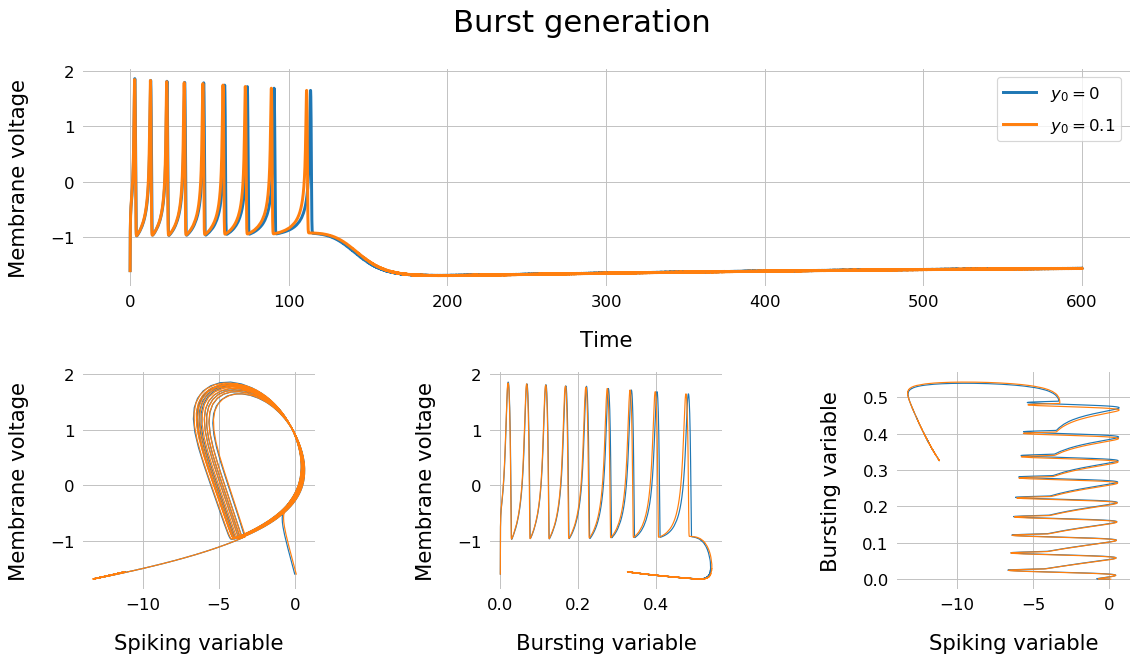

In [6]:
plot(1);